In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [98]:
# Define Dataset
data = pd.read_csv("SPY.csv")

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.299288,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.486324,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.542448,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.822998,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.935240,531500


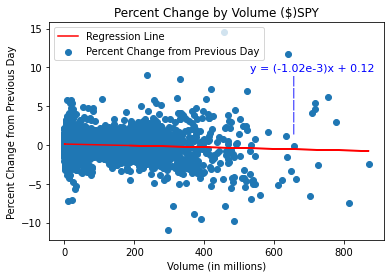

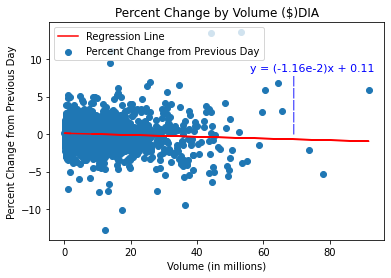

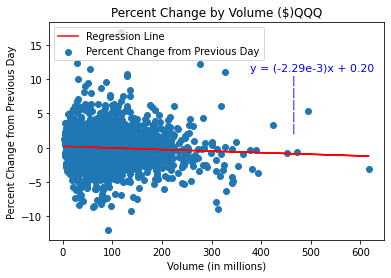

In [121]:
set = ['SPY', 'DIA', 'QQQ']
for ticker in set:
    
    # Define Dataset
    df = pd.read_csv(ticker+'.csv')

    # Calculate percent change from the previous day
    df['PercentChange'] = df['Close'].pct_change() * 100

    # Drop NaN values resulting from the percent change calculation
    df = df.dropna()

    # Extracting relevant columns
    X = df['Volume'].values.reshape(-1, 1) / 1e6
    y = df['PercentChange']

    # Create scatter plot
    plt.scatter(X, y, label='Percent Change from Previous Day')

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot regression line
    plt.plot(X, y_pred, color='red', label='Regression Line')

    # Format the coefficient in the regression equation
    coef_str = "{:0.2e}".format(model.coef_[0]).replace("e-0", "e-")
    intercept_str = "{:0.2f}".format(model.intercept_)

    # Display equation for the regression line
    indent = '\n            |'
    equation = f"y = ({coef_str})x + {intercept_str} {indent * 5}"
    plt.annotate(equation, xy=(0.6, 0.5), xycoords='axes fraction', fontsize=11, color='blue')

    # Customize plot
    plt.title(f'Percent Change by Volume ($){ticker}')
    plt.xlabel('Volume (in millions)')
    plt.ylabel('Percent Change from Previous Day')
    plt.legend(loc='upper left')  # Set the legend location to the top left
    plt.show()

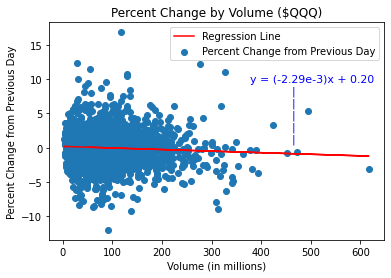

In [115]:

# Define Dataset
df = pd.read_csv("QQQ.csv")

# Calculate percent change from the previous day
df['PercentChange'] = df['Close'].pct_change() * 100

# Drop NaN values resulting from the percent change calculation
df = df.dropna()

# Extracting relevant columns
X = df['Volume'].values.reshape(-1, 1) / 1e6
y = df['PercentChange']

# Create scatter plot
plt.scatter(X, y, label='Percent Change from Previous Day')

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Format the coefficient in the regression equation
coef_str = "{:0.2e}".format(model.coef_[0]).replace("e-0", "e-")
intercept_str = "{:0.2f}".format(model.intercept_)

# Display equation for the regression line
indent = '\n            |'
equation = f"y = ({coef_str})x + {intercept_str} {indent * 5}"
plt.annotate(equation, xy=(0.6, 0.45), xycoords='axes fraction', fontsize=11, color='blue')

# Customize plot
plt.title('Percent Change by Volume ($QQQ)')
plt.xlabel('Volume (in millions)')
plt.ylabel('Percent Change from Previous Day')
plt.legend()
plt.show()
